In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

#from matplotlib.cm import rainbow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
os.chdir('/content/drive/My Drive/ML')
os.listdir('.')
file_exists = os.path.isfile('auto.csv')
file_exists

True

In [ ]:
df_automobile = 'auto.csv'
df_automobile = pd.read_csv(df_automobile)
df_automobile

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df_automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

In [ ]:
#cleaning
#replcae ? dengan none

df_automobile.replace("?", np.nan, inplace=True)

In [ ]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df_automobile.isnull().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
 engine-size          0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

In [ ]:
avg_norm_loss = df_automobile['normalized-losses'].astype('float').mean(axis=0)
avg_norm_bore = df_automobile['bore'].astype('float').mean(axis=0)
avg_norm_stroke = df_automobile['stroke'].astype('float').mean(axis=0)
avg_norm_horse= df_automobile['horsepower'].astype('float').mean(axis=0)
avg_norm_peak= df_automobile['peak-rpm'].astype('float').mean(axis=0)


#avg_norm_loss
#avg_norm_bore
#avg_norm_stroke
#avg_norm_horse
#avg_norm_peak

In [ ]:
df_automobile['normalized-losses'].replace( np.nan, avg_norm_loss , inplace=True)
df_automobile['bore'].replace( np.nan, avg_norm_bore , inplace=True)
df_automobile['stroke'].replace( np.nan, avg_norm_stroke , inplace=True)
df_automobile['horsepower'].replace( np.nan, avg_norm_horse , inplace=True)
df_automobile['peak-rpm'].replace( np.nan, avg_norm_peak , inplace=True)

df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df_automobile.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
num-of-doors         2
price                4
dtype: int64

In [ ]:
df_automobile['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
df_automobile['num-of-doors'].replace(np.nan, "four", inplace=True)
df_automobile.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                4
dtype: int64

In [ ]:
df_automobile.dropna(subset=['price'], axis=0 , inplace=True)
df_automobile.isnull().sum().sort_values()

symboling            0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
 engine-size         0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
highway-mpg          0
price                0
dtype: int64

In [ ]:
df_automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
df_automobile[["bore","stroke","price","peak-rpm"]] = df_automobile[["bore","stroke","price","peak-rpm"]].astype("float")
df_automobile[["horsepower","normalized-losses"]] = df_automobile[["horsepower","normalized-losses"]].astype("int")
df_automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e0a05e48>,
      dtype=object)

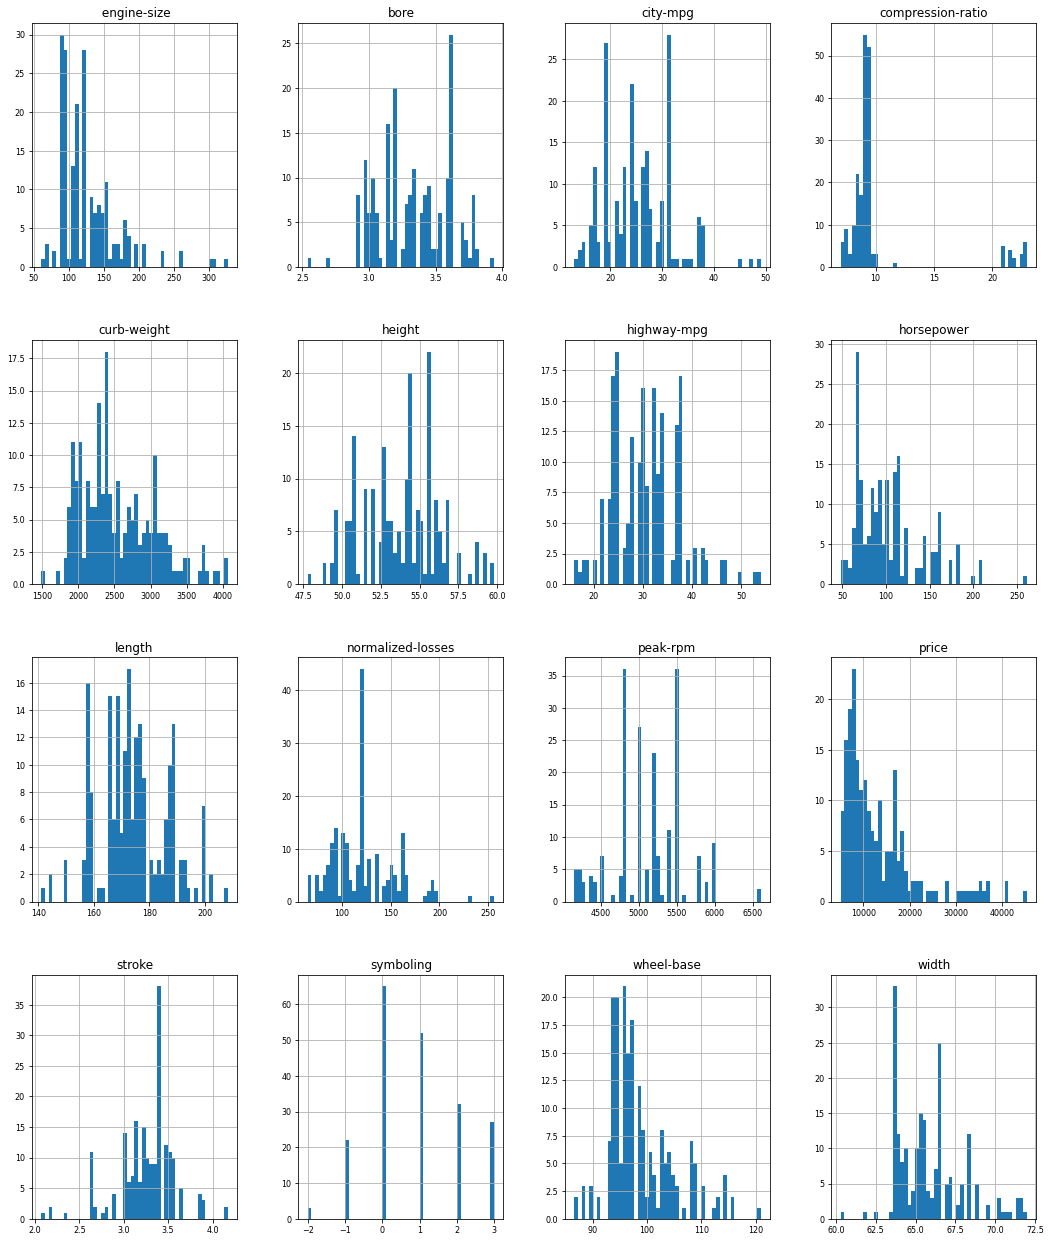

In [ ]:
df_automobile_numbers = df_automobile.select_dtypes(include=['float64','int'])
df_automobile_numbers.hist(figsize=(18,22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#feature enginering

df_automobile['city-L/100km'] = 235 / df_automobile ['city-mpg']
df_automobile['highway-L/100km'] = 235 / df_automobile ['highway-mpg']

df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [ ]:
#binning

df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [ ]:
print(min(df_automobile['horsepower']),max(df_automobile['horsepower']))

48 262


In [ ]:
bins = np.linspace(min(df_automobile['horsepower']),max(df_automobile['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['horsepower-low','horsepower-med','horsepower-high']
df_automobile['horsepower-categories'] = pd.cut(df_automobile['horsepower'], bins, labels=group_names, include_lowest=True)

df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-med
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low


In [ ]:
#one hot encoding

df_automobile['fuel-type'].value_counts()


gas       181
diesel     20
Name: fuel-type, dtype: int64

In [ ]:
fuel_categorized = pd.get_dummies(df_automobile['fuel-type'])

fuel_categorized

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [ ]:
df_automobile = pd.concat([df_automobile, fuel_categorized],axis=1)
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-med,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1


In [ ]:
make_categorized = pd.get_dummies(df_automobile['make'])

make_categorized

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_automobile = pd.concat([df_automobile, make_categorized],axis=1)
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-med,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cleanump_nums ={
    'num-of-doors':{
        'four': 4,
        'two': 2
    },
    'num-of-cylinders':{
        'two': 2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        'eight':8,
        'twelve':12
    }
}
df_automobile.replace(cleanump_nums, inplace=True)
df_automobile.head()
       

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-med,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_automobile.drop (['make','city-mpg','highway-mpg'],axis=1,inplace=True)
df_automobile.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-categories,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,13495.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,horsepower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,horsepower-med,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,horsepower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
standardscaler = StandardScaler()

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_standardscaler = standardscaler.fit_transform(feature.values)
label_standardscaler = standardscaler.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_standardscaler, label_standardscaler, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Standard Scaler :', mse)
print('MAE Standard Scaler :',  mae)
print('R2 Standard Scaler  :', r2)
print('RMSE Standard Scaler:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Standard Scaler : 0.09140393965290175
MAE Standard Scaler : 0.20680724713887233
R2 Standard Scaler  : 0.8647204567519787
RMSE Standard Scaler: 0.3023308446931966


In [ ]:
jon = PowerTransformer(method='yeo-johnson', standardize=True)

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_jon = jon.fit_transform(feature.values)
label_jon = jon.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_jon, label_jon, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE  :', mse)
print('MAE  :',  mae)
print('R2   :', r2)
print('RMSE :', np.sqrt(mean_squared_error(label_test, predict)))

MSE  : 0.0
MAE  : 0.0
R2   : 1.0
RMSE : 0.0


In [ ]:
powerbox = PowerTransformer(method='box-cox', standardize=True)

feature_powerbox = powerbox.fit_transform(feature.values)
label_box = powerbox.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()

ValueError: ignored

In [ ]:
q = QuantileTransformer()

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_q = q.fit_transform(feature.values)
label_q = q.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_q, label_q, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE  :', mse)
print('MAE  :',  mae)
print('R2   :', r2)
print('RMSE :', np.sqrt(mean_squared_error(label_test, predict)))

MSE  : 0.00593617199016898
MAE  : 0.06244589262257328
R2   : 0.9252603943066438
RMSE : 0.07704655728953098


In [ ]:
min = MinMaxScaler()

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_min = min.fit_transform(feature.values)
label_min = min.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_min, label_min, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE  :', mse)
print('MAE  :',  mae)
print('R2   :', r2)
print('RMSE :', np.sqrt(mean_squared_error(label_test, predict)))

MSE  : 0.0035665571616738233
MAE  : 0.04103894279206102
R2   : 0.863701575040187
RMSE : 0.05972065942095602


In [ ]:
max = MaxAbsScaler()

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_max = max.fit_transform(feature.values)
label_max = max.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_max, label_max, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE  :', mse)
print('MAE  :',  mae)
print('R2   :', r2)
print('RMSE :', np.sqrt(mean_squared_error(label_test, predict)))

MSE  : 0.002807757095585589
MAE  : 0.036412570342506584
R2   : 0.8637015750401871
RMSE : 0.05298827318931604


In [ ]:
robust = RobustScaler()

feature = df_automobile.drop(['price','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','horsepower-categories',], axis = 1)
label = df_automobile['price']

feature_robust = robust.fit_transform(feature.values)
label_robust = robust.fit_transform(df_automobile['price'].values.reshape(-1,1)).flatten()
feature_train, feature_test, label_train, label_test = train_test_split(feature_robust, label_robust, test_size = 0.25, random_state = 10)

line = LinearRegression()
line.fit(feature_train, label_train)
predict = line.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE  :', mse)
print('MAE  :',  mae)
print('R2   :', r2)
print('RMSE :', np.sqrt(mean_squared_error(label_test, predict)))

MSE  : 0.07602218852242437
MAE  : 0.18947056659596934
R2   : 0.8637015750401827
RMSE : 0.2757212152200559


In [ ]:
rf = RandomForestRegressor(n_estimators = 1000 )
rf.fit(feature_train, label_train)
predict = rf.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.0
MAE Random Forest : 0.0
R2 Random Forest  : 1.0
RMSE Random Forest: 0.0


In [ ]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(feature_train, label_train)
predict = knn.predict(feature_test)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.0
MAE Random Forest : 0.0
R2 Random Forest  : 1.0
RMSE Random Forest: 0.0


In [ ]:
svr = SVR(kernel = 'linear')
svr.fit(feature_train, label_train)
mse = mean_squared_error(label_test, predict)
mae = mean_absolute_error(label_test, predict)
r2 = r2_score(label_test, predict)

In [ ]:
print('MSE Random Forest :', mse)
print('MAE Random Forest :',  mae)
print('R2 Random Forest  :', r2)
print('RMSE Random Forest:', np.sqrt(mean_squared_error(label_test, predict)))

MSE Random Forest : 0.0
MAE Random Forest : 0.0
R2 Random Forest  : 1.0
RMSE Random Forest: 0.0
